In [1]:
#Random forest 
#Multiple trees are generated parallely
#Data is created at random with replacement for each of the tree
#Split feature is selected at random for ech of the tree
#Maximum class vote for classification / average value for continuous is the output


In [2]:

import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
#attributes of digits object
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

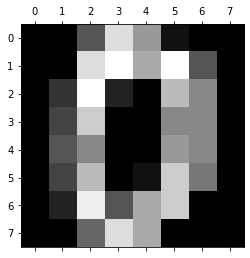

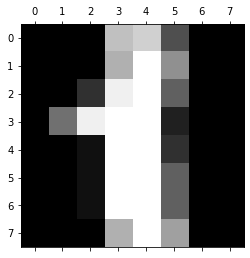

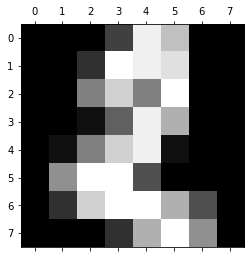

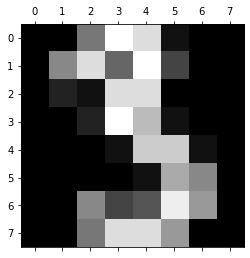

In [4]:
#plot first 4# images
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
#create features data
#dgitis.data gives 64 pixels

df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
#mereg target data
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
#view data
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [8]:
#set featuires and target
X = df.drop('target',axis='columns')
y = df.target

In [9]:
#train test split
#80:20 train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
# select random classifier
# using 20 random tress
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [11]:
#predict
y_predicted = model.predict(X_test)

y_predicted

array([5, 4, 7, 1, 8, 0, 4, 8, 7, 0, 6, 9, 6, 7, 3, 5, 5, 3, 6, 3, 8, 5,
       8, 7, 6, 1, 5, 3, 5, 1, 3, 1, 9, 4, 5, 4, 5, 6, 1, 7, 4, 1, 8, 4,
       2, 0, 5, 1, 4, 3, 2, 6, 0, 2, 8, 1, 4, 1, 7, 9, 7, 0, 2, 6, 2, 3,
       2, 6, 9, 2, 7, 3, 3, 0, 5, 5, 2, 9, 1, 7, 4, 8, 4, 1, 3, 7, 2, 0,
       5, 7, 8, 9, 8, 9, 5, 1, 4, 7, 8, 4, 2, 1, 0, 0, 8, 3, 1, 0, 7, 4,
       3, 2, 2, 7, 8, 5, 9, 5, 9, 2, 6, 8, 0, 5, 8, 2, 6, 6, 3, 8, 1, 6,
       3, 0, 8, 1, 9, 1, 5, 0, 7, 9, 7, 7, 5, 6, 8, 8, 0, 5, 0, 6, 0, 5,
       7, 0, 2, 9, 0, 8, 9, 7, 0, 3, 1, 3, 6, 4, 3, 1, 1, 6, 9, 2, 6, 6,
       0, 7, 3, 6, 3, 9, 6, 4, 3, 5, 6, 0, 6, 5, 9, 0, 0, 0, 8, 6, 7, 7,
       1, 2, 6, 3, 8, 9, 2, 3, 1, 2, 2, 4, 5, 7, 3, 9, 4, 7, 5, 7, 9, 3,
       7, 6, 4, 8, 6, 7, 3, 6, 8, 6, 9, 0, 7, 0, 9, 9, 0, 3, 9, 7, 8, 1,
       9, 5, 5, 1, 5, 2, 8, 9, 3, 2, 4, 0, 8, 3, 5, 2, 6, 9, 4, 7, 9, 7,
       0, 4, 8, 2, 8, 6, 1, 3, 2, 6, 4, 0, 0, 9, 0, 0, 5, 3, 2, 8, 6, 1,
       1, 0, 8, 5, 4, 8, 5, 5, 1, 2, 5, 3, 1, 1, 4,

In [12]:
#score
model.score(X_test, y_test)

0.9611111111111111

Text(69.0, 0.5, 'Truth')

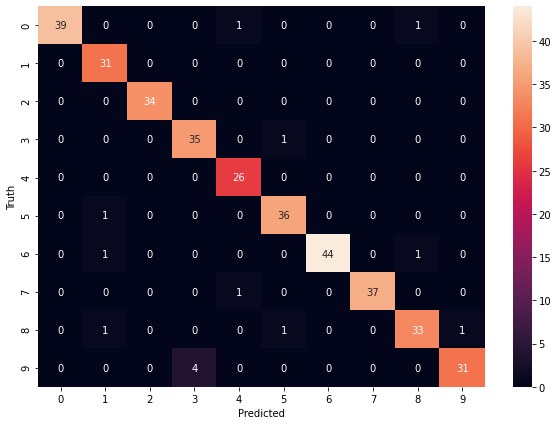

In [13]:
#cofusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')